## Polynomial Regression

In [10]:
# Let's load the data into python and take a look at it
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline  

In [11]:
dataset = pd.read_csv('data/soda.csv')
dataset.head()

,temperature,units_sold
0,44.0,2600.0
1,96.0,12126.0
2,96.0,12107.0
3,36.0,1639.0
4,42.0,2400.0


In [6]:
# Let's get some more information about our dataset
dataset.describe()

,temperature,units_sold
count,50.000000,50.000000
mean,62.720000,5699.840000
std,20.945059,3619.349493
min,30.000000,1042.000000
25%,44.000000,3037.500000
50%,60.500000,4992.000000
75%,77.000000,7503.500000
max,99.000000,13194.000000


Text(0, 0.5, 'soda units sold')

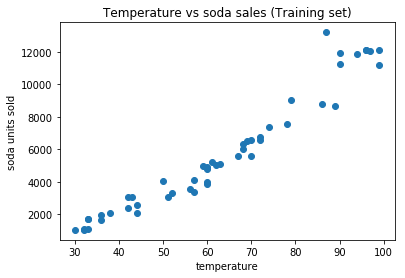

In [7]:
# Scatter plot
plt.scatter(dataset.temperature, dataset.units_sold)
plt.title('Temperature vs soda sales (Training set)')
plt.xlabel('temperature')
plt.ylabel('soda units sold')

In [8]:
# Preprocessing
X = dataset.iloc[:, :-1].values #Get values of first col to second last col
y = dataset.iloc[:, 1].values #Get values of second col

In [9]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

#Assume deg=2 based on scatter plot
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [14]:
print(X_train[0:5])
print(X_train_poly[0:5])

[[57.]
 [52.]
 [96.]
 [56.]
 [44.]]
[[1.000e+00 5.700e+01 3.249e+03]
 [1.000e+00 5.200e+01 2.704e+03]
 [1.000e+00 9.600e+01 9.216e+03]
 [1.000e+00 5.600e+01 3.136e+03]
 [1.000e+00 4.400e+01 1.936e+03]]


In [15]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
#train
regressor.fit(X_train_poly, y_train)
#predict
y_pred = regressor.predict(X_test_poly)

In [17]:
y_pred

array([ 6651.4769704 ,  5781.22993067,  7967.81101922,  9612.17592246,
       11640.56493337,  4510.15338251,  7015.90715182,  1410.36368188,
        3388.39217638,  1322.63720605,  4660.87226826,  2529.33636253,
        4660.87226826, 11877.60675124,  2304.88931425])

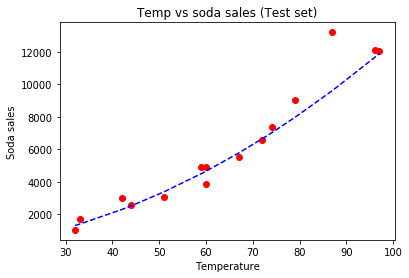

In [18]:
plt.scatter(X_test, y_test, color='red')
plt.plot(sorted(X_test), sorted(y_pred), '--', color='blue')
plt.title('Temp vs soda sales (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Soda sales')
plt.show()

In [24]:
## Evaluation
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
ex_var_score = explained_variance_score(y_test, y_pred)
m_absolute_error = mean_absolute_error(y_test, y_pred)
m_squared_error = mean_squared_error(y_test, y_pred)
r_2_score = r2_score(y_test, y_pred)

print("Explained variance score: ", ex_var_score)
print("Mean Absolute Error: ",m_absolute_error)
print("Mean Squared Error: ",m_squared_error)
print("R Squared Score: ",r_2_score)

Explained variance score:  0.9359848906566854
Mean Absolute Error:  603.7285176140605
Mean Squared Error:  1069292.5804088728
R Squared Score:  0.9256428304723772
